## Spline demo
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thodson-usgs/ratingcurve/blob/master/notebooks/spline-demo.ipynb)  

Splines are another approach to fitting stage-discharge rating curves.
They have the advantage of being very easy (fast) to fit,
but their form is less constrained than the segmented power law.
As a result, splines may produce strange results, particularly with small datasets.

In [1]:
%load_ext autoreload
%autoreload 2

import pymc as pm
import arviz as az
from ratingcurve.ratingmodel import PowerLawRating, SplineRating

import numpy as np

from ratingcurve import data
data.list()

['chalk artificial',
 'co channel',
 'green channel',
 'provo natural',
 '3-segment simulated']

In [2]:
df = data.load('green channel')

spline_rating = SplineRating(q=df['q'],
                             h=df['stage'],
                             q_sigma=df['q_sigma'],
                             df=8)

Finished [100%]: Average Loss = -36.495


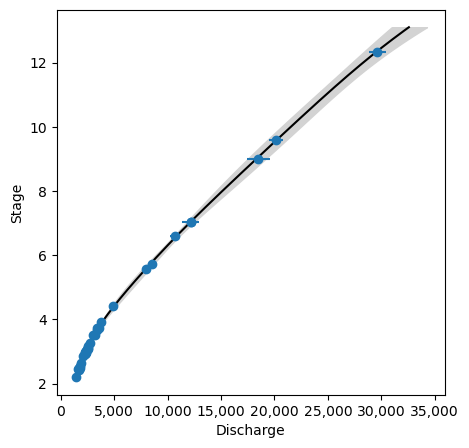

In [3]:
# requires fewer iterations than power law
with spline_rating:
    mean_field = pm.fit(method='advi', n=70_000)
    trace = mean_field.sample(5000)

spline_rating.plot(trace)

# Spline with simulated data

Text(0, 0.5, 'Stage (ft)')

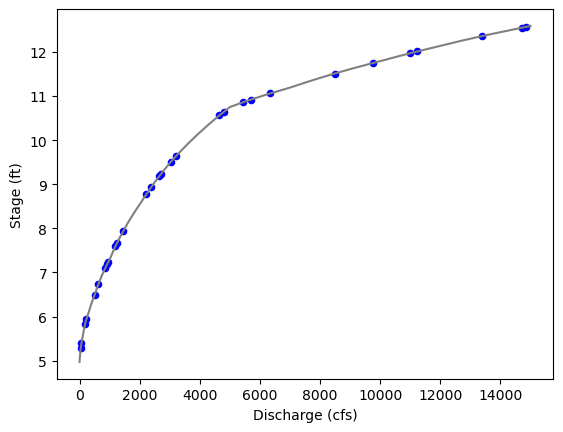

In [4]:
sim_df = data.load('3-segment simulated')

# subsample the simulated rating curve
n = 30
df = sim_df.sample(n)

ax = sim_df.plot(x='q', y='stage', color='gray', ls='-', legend=False)
df.plot.scatter(x='q', y='stage', marker='o', color='blue', ax=ax)
ax.set_xlabel("Discharge (cfs)")
ax.set_ylabel("Stage (ft)")

In [5]:
spline_rating = SplineRating(q=df['q'],
                             h=df['stage'],
                             df=10)

Finished [100%]: Average Loss = -24.762


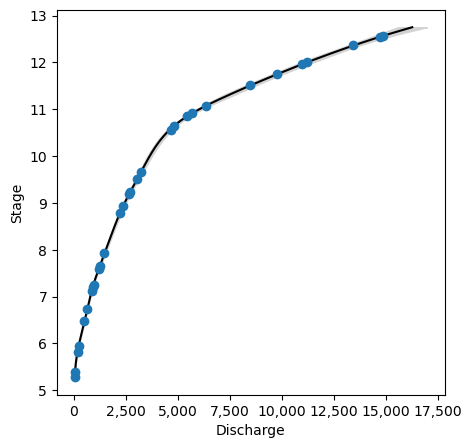

In [6]:
with spline_rating:
    mean_field = pm.fit(method='advi', n=100_000)
    trace = mean_field.sample(5000)

spline_rating.plot(trace)


### Excercise 
Splines can give unexpectedly poor results.
For example, try 
`sim_df.sample(n=30, random_state=771)`  

# Spline versus power law

In [ ]:
# TODO